In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import svm
from Utils import GeoUtils

from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline

# import gmplot package 
import gmplot 
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
data = pd.read_csv("Dados/LocTreino_Equipe_4.csv")

bts_data = pd.read_csv("Dados/dados_BTSs.csv")

In [3]:
data.drop_duplicates(inplace=True)
data.shape
data = data.drop(['pontoId'], axis=1)
data['taBTS2'] = data['taBTS2'].fillna(data['taBTS2'].mean())
data['taBTS4'] = data['taBTS4'].fillna(data['taBTS4'].mean())
data.describe()

,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0000
mean,-8.070097,-34.894814,116.654370,119.101165,123.863545,115.814052,121.320526,125.656192,0.663333,1.008733,2.525333,1.099388,1.093333,1.0560
std,0.004232,0.004354,15.229664,12.666188,9.031316,12.414620,12.552702,13.134365,0.698317,0.863886,0.967117,1.954747,0.856998,0.6692
min,-8.077570,-34.906830,86.256667,77.256667,88.340000,84.056667,79.523333,89.856667,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000
25%,-8.073197,-34.897387,106.827500,111.673333,119.190000,106.583750,112.823333,116.077500,0.000000,0.000000,2.000000,0.000000,0.000000,1.0000
50%,-8.069940,-34.895346,117.156667,120.690000,124.273333,116.273333,122.840000,128.756667,1.000000,1.000000,3.000000,1.000000,1.000000,1.0000
75%,-8.067113,-34.891169,124.790000,128.808750,130.117083,125.590000,130.423333,135.996250,1.000000,1.000000,3.000000,1.000000,2.000000,2.0000
max,-8.059339,-34.885067,476.882449,144.890000,145.890000,145.423333,146.890000,150.123333,3.000000,11.090452,5.000000,38.747484,3.000000,2.0000


In [34]:
def plotMap(lat, lon, filename):
  
    lat_focus = lat.mean()
    lon_focus = lon.mean()


    gmap3 = gmplot.GoogleMapPlotter(lat_focus, 
                                    lon_focus, 13) 


    gmap3.scatter( lat, lon, '# 0000FF',size = 40, marker = False ) 
    gmap3.draw( filename )

plotMap(data['lat'].values, data['lon'].values, 'positionmap.html')

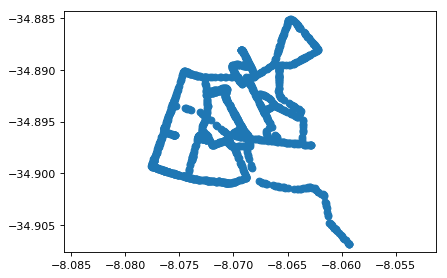

In [32]:
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(data['lat'], data['lon'])
plt.margins(x=0.0, y=-0.25)
plt.show()


 mu = -34.89 and sigma = 0.004352



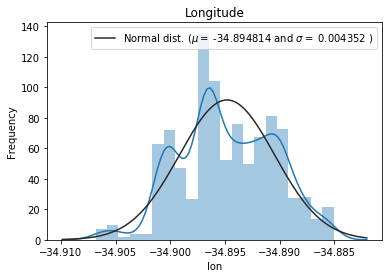

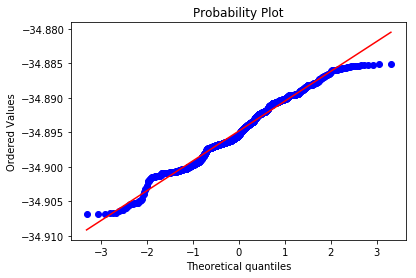


 mu = -8.07 and sigma = 0.004231



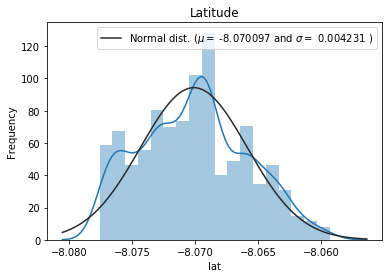

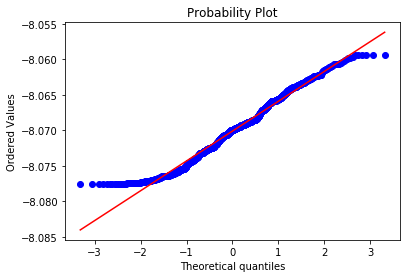

In [48]:
def printDistplotAndProbability(data, title):
    sns.distplot(data , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)
    print( '\n mu = {:.2f} and sigma = {:f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:f} and $\sigma=$ {:f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title(title)

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(data, plot=plt)
    plt.show()


printDistplotAndProbability(data['lon'], 'Longitude')
printDistplotAndProbability(data['lat'], 'Latitude')

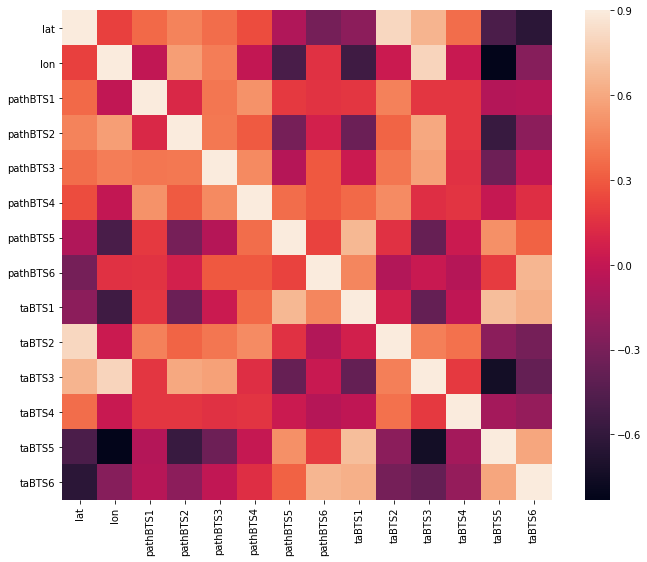

In [47]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)